<a href="https://colab.research.google.com/github/alxfernandes/imersao_dados_4_alura/blob/main/Imersao_dados_4_aula_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**AULA 03**

Resumo: nesta aula, realizamos mais alguns tratamentos na base original, melhorando a forma de calcular a média do m2 dos bairros, aplicamos mais conceitos de análise exploratória e iniciamos a integração com a base do IBGE. Ao final, Paulo nos desafiou a formatar melhor nosso notebook (rsrs)

#Tratamento de dados e análises Exploratórias

##Base de dados Vendas

In [2]:
import pandas as pd

#dataset básico
url = "https://gist.githubusercontent.com/tgcsantos/3bdb29eba6ce391e90df2b72205ba891/raw/22fa920e80c9fa209a9fccc8b52d74cc95d1599b/dados_imoveis.csv"
dados = pd.read_csv(url)

In [3]:
dados.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000


In [4]:
dados.sample(10)

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor
1473,Rua Melo Morais Filho,Jardim Guedala,São Paulo,545,4,6,4,R$ 8.500.000
2205,Rua Maria Clara Martins da Silveira,Jurubatuba,São Paulo,161,2,4,3,R$ 640.000
3119,Rua Tefé,Sumaré,São Paulo,335,4,4,4,R$ 3.700.000
6640,"Rua Luiz Galhanone, 404",Jardim Viana,São Paulo,280,4,5,3,R$ 2.500.000
3562,Avenida Rebouças,Pinheiros,São Paulo,360,4,3,10,R$ 22.000\n /Mês
5051,NaN,Vila Ida,São Paulo,490,5,5,10,R$ 2.400.000
8825,NaN,Chácara Monte Alegre,São Paulo,294,4,3,6,R$ 1.600.000
9357,Rua Palmares,Brooklin Paulista,São Paulo,355,5,4,3,R$ 2.200.000
4714,Rua Giovanni Carnovali,Vila Caraguatá,São Paulo,128,4,2,2,R$ 500.000
7028,Rua Romão Puiggari,Vila Moraes,São Paulo,68,2,1,1,R$ 315.000


In [5]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10008 entries, 0 to 10007
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Rua        6574 non-null   object
 1   Bairro     9996 non-null   object
 2   Cidade     10008 non-null  object
 3   Metragem   10008 non-null  int64 
 4   Quartos    10008 non-null  int64 
 5   Banheiros  10008 non-null  int64 
 6   Vagas      10008 non-null  int64 
 7   Valor      10008 non-null  object
dtypes: int64(4), object(4)
memory usage: 625.6+ KB


In [6]:
#tratamento coluna de valor
dados["Valor"][0]

'R$ 7.000.000'

In [7]:
#split do Valor em campos específicos
dados[["Moeda", "Valor_anuncio", "Tipo_anuncio"]] = dados["Valor"].str.split(expand = True)

#convertendo em float para utilização 
dados["Valor_anuncio_float"] = dados["Valor_anuncio"].str.replace(".","").astype(float)
dados.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.0
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.0
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.0
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.0
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.0


In [8]:
#Criando um DF apenas com os anúncios de venda
dados_vendas = dados[dados["Tipo_anuncio"].isnull()]
dados_vendas.head()

,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.0
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.0
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.0
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.0
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.0


In [9]:
#informações básicas do novo DF dados_vendas
dados_vendas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9156 entries, 0 to 10007
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rua                  6107 non-null   object 
 1   Bairro               9146 non-null   object 
 2   Cidade               9156 non-null   object 
 3   Metragem             9156 non-null   int64  
 4   Quartos              9156 non-null   int64  
 5   Banheiros            9156 non-null   int64  
 6   Vagas                9156 non-null   int64  
 7   Valor                9156 non-null   object 
 8   Moeda                9156 non-null   object 
 9   Valor_anuncio        9156 non-null   object 
 10  Tipo_anuncio         0 non-null      object 
 11  Valor_anuncio_float  9156 non-null   float64
dtypes: float64(1), int64(4), object(7)
memory usage: 929.9+ KB


In [10]:
#estatísticas básicas das séries numéricas
dados_vendas.describe()

,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float
count,9156.000000,9156.000000,9156.000000,9156.000000,9.156000e+03
mean,434.416230,3.446811,3.797073,3.960135,3.052203e+06
std,7856.422978,1.048944,1.967873,2.601022,3.944208e+06
min,10.000000,1.000000,1.000000,1.000000,1.300000e+04
25%,168.000000,3.000000,2.000000,2.000000,8.900000e+05
50%,276.000000,3.000000,4.000000,4.000000,1.800000e+06
75%,450.000000,4.000000,5.000000,5.000000,3.500000e+06
max,750000.000000,16.000000,40.000000,50.000000,6.500000e+07


In [11]:
#estatísticas básicas das séries categóricas
dados_vendas[["Rua", "Bairro", "Cidade"]].describe()

,Rua,Bairro,Cidade
count,6107,9146,9156
unique,3006,697,1
top,Rua Alberto Faria,Alto de Pinheiros,São Paulo
freq,24,369,9156


In [12]:
#criando uma escala de Milhões (Desafio 01 - Aula 02)
escala = 1000000
dados_vendas['valor_milhoes'] = dados_vendas['Valor_anuncio_float'] / escala
dados_vendas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,valor_milhoes
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.0,7.000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.0,3.700
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.0,0.380
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.0,0.685
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.0,0.540
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10002,Avenida Odila,Planalto Paulista,São Paulo,267,3,6,4,R$ 1.500.000,R$,1.500.000,None,1500000.0,1.500
10003,Rua Tapuçu,Vila Sofia,São Paulo,95,2,2,2,R$ 665.000,R$,665.000,None,665000.0,0.665
10004,Rua Guararema,Bosque da Saúde,São Paulo,605,8,7,5,R$ 2.300.000,R$,2.300.000,None,2300000.0,2.300
10005,Rua Estero Belaco,Vila da Saúde,São Paulo,205,3,3,6,R$ 1.050.000,R$,1.050.000,None,1050000.0,1.050


In [13]:
#Criando uma nova coluna com a valor por m2 do imóvel
dados_vendas["Valor_m2"] = dados_vendas["Valor_anuncio_float"]/dados_vendas["Metragem"]
dados_vendas.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Rua,Bairro,Cidade,Metragem,Quartos,Banheiros,Vagas,Valor,Moeda,Valor_anuncio,Tipo_anuncio,Valor_anuncio_float,valor_milhoes,Valor_m2
0,"Avenida Itacira, 255",Planalto Paulista,São Paulo,1000,4,8,6,R$ 7.000.000,R$,7.000.000,None,7000000.0,7.000,7000.000000
1,"Rua Aurelia Perez Alvarez, 42",Jardim dos Estados,São Paulo,496,4,4,4,R$ 3.700.000,R$,3.700.000,None,3700000.0,3.700,7459.677419
2,Rua Alba Valdez,Jardim Reimberg,São Paulo,125,4,3,2,R$ 380.000,R$,380.000,None,380000.0,0.380,3040.000000
3,NaN,Jardim Morumbi,São Paulo,310,3,2,4,R$ 685.000,R$,685.000,None,685000.0,0.685,2209.677419
4,"Rua Tobias Barreto, 195",Mooca,São Paulo,100,3,2,2,R$ 540.000,R$,540.000,None,540000.0,0.540,5400.000000


In [14]:
#Criando um DF específico para tratar os dados agrupados por bairro (Desafio 03 - Aula 2)
dados_bairro = dados_vendas.groupby("Bairro").sum()

#calculando o valor médio do m2 do bairro
dados_bairro["Valor_m2_bairro"] = dados_bairro["Valor_anuncio_float"]/dados_bairro["Metragem"]

#esta coluna não faz sentido...
del dados_bairro["Valor_m2"]

#definição de variável com a lista dos 10 top bairros
top_bairros = dados_vendas["Bairro"].value_counts()[:10].index

#reset de index do dataset após o group
dados_bairro.reset_index(inplace = True)
dados_bairro


dados_bairro.query("Bairro in @top_bairros")

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,valor_milhoes,Valor_m2_bairro
4,Alto de Pinheiros,158616,1453,1782,1827,1.764816e+09,1764.815915,11126.342330
19,Brooklin Paulista,70002,778,862,832,4.757968e+08,475.796789,6796.902788
57,Cidade Jardim,132220,789,1008,1172,1.164211e+09,1164.210900,8805.104372
155,Jardim Europa,118898,795,993,1056,2.414173e+09,2414.172900,20304.571145
168,Jardim Guedala,972212,1443,2027,2161,1.801166e+09,1801.165587,1852.646940
187,Jardim Leonor,97141,697,941,902,6.463264e+08,646.326369,6653.486880
227,Jardim Paulista,130283,1028,1231,1171,2.136081e+09,2136.081000,16395.700130
338,Pacaembu,100285,774,889,1028,8.679565e+08,867.956500,8654.898539
396,Planalto Paulista,59250,636,768,713,3.749070e+08,374.907000,6327.544304
564,Vila Madalena,66250,739,786,712,5.832530e+08,583.253030,8803.819321




## Dataframe IBGE

In [52]:
#Desafio 01 - Aula 3

ibge_url = "https://gist.githubusercontent.com/tgcsantos/85f8c7b0a2edbc3e27fcad619b37d886/raw/a4954781e6bca9cb804062a3eea0b3b84679daf4/Basico_SP1.csv"
dados_ibge = pd.read_csv(ibge_url, sep=';', encoding='utf8')
dados_ibge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18363 entries, 0 to 18362
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Cod_setor            18363 non-null  int64  
 1   Cod_Grandes Regi�es  18363 non-null  int64  
 2   Nome_Grande_Regiao   18363 non-null  object 
 3   Cod_UF               18363 non-null  int64  
 4   Nome_da_UF           18363 non-null  object 
 5   Cod_meso             18363 non-null  int64  
 6   Nome_da_meso         18363 non-null  object 
 7   Cod_micro            18363 non-null  int64  
 8   Nome_da_micro        18363 non-null  object 
 9   Cod_RM               18363 non-null  int64  
 10  Nome_da_RM           18363 non-null  object 
 11  Cod_municipio        18363 non-null  int64  
 12  Nome_do_municipio    18363 non-null  object 
 13  Cod_distrito         18363 non-null  int64  
 14  Nome_do_distrito     18363 non-null  object 
 15  Cod_subdistrito      18363 non-null 

In [54]:
dados_ibge['Nome_Grande_Regiao'].unique()

array(['Regi�o Sudeste'], dtype=object)

In [64]:
dados_ibge['Nome_da_UF '].describe()
#pode ser excluída - Valores iguais

count         18363
unique            1
top       S�o Paulo
freq          18363
Name: Nome_da_UF , dtype: object

In [66]:
dados_ibge['Nome_da_meso'].describe()
#pode ser excluída - Valores iguais

count                          18363
unique                             1
top       Metropolitana de S�o Paulo
freq                           18363
Name: Nome_da_meso, dtype: object

In [67]:
dados_ibge['Nome_da_micro'].describe()
#pode ser excluída - Valores iguais

count         18363
unique            1
top       S�o Paulo
freq          18363
Name: Nome_da_micro, dtype: object

In [68]:
dados_ibge['Nome_do_municipio'].describe()
#pode ser excluída - Valores iguais

count         18363
unique            1
top       S�O PAULO
freq          18363
Name: Nome_do_municipio, dtype: object

In [70]:
dados_ibge['Nome_do_distrito'].describe()
#Manter, mas precisa de tratamento

count      18363
unique        96
top       GRAJA�
freq         609
Name: Nome_do_distrito, dtype: object

In [71]:
dados_ibge['Nome_do_subdistrito'].describe()
#pode ser excluída - Valores iguais o do distrito

count      18363
unique        96
top       GRAJA�
freq         609
Name: Nome_do_subdistrito, dtype: object

In [72]:
dados_ibge['Nome_do_bairro'].describe()
#pode ser excluída - Valores iguais

count                            18363
unique                               1
top       S�O PAULO (todos os setores)
freq                             18363
Name: Nome_do_bairro, dtype: object

In [74]:
dados_ibge['Situacao_setor'].describe()
#Manter

count    18363.000000
mean         1.154877
std          0.949651
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max          8.000000
Name: Situacao_setor, dtype: float64

In [75]:
dados_ibge['Unnamed: 33'].describe()
#limar

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Unnamed: 33, dtype: float64

In [79]:
dados_ibge.drop(['Cod_setor', 'Cod_Grandes Regi�es', 'Nome_Grande_Regiao', 'Cod_UF',
           'Nome_da_UF ', 'Cod_meso', 'Nome_da_meso', 'Cod_micro', 'Nome_da_micro',
           'Cod_RM', 'Nome_da_RM', 'Cod_municipio', 'Unnamed: 33', 'Cod_bairro',
           'Nome_do_bairro', 'Cod_subdistrito','Nome_do_subdistrito'], axis=1, inplace=True)

dados_ibge.head()

,Nome_do_municipio,Cod_distrito,Nome_do_distrito,Situacao_setor,Tipo_setor,V001,V002,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,S�O PAULO,355030801,�GUA RASA,1,0,266.0,800.0,"3,01","2,32","2091,32","8532451,78","2164,55","8673276,78","1227,41","4285771,99","1713,75","5152087,86"
1,S�O PAULO,355030801,�GUA RASA,1,0,306.0,913.0,"2,98","2,09","1650,09","3983441,31","1717,44","4030519,99","1045,78","2572133,32","1468,08","2991546,94"
2,S�O PAULO,355030801,�GUA RASA,1,0,189.0,625.0,"3,31","3,08","1280,43","5474593,06","2349,53","7553913,02","902,97","2735492,52","1786,79","3837674,74"
3,S�O PAULO,355030801,�GUA RASA,1,0,181.0,572.0,"3,16","2,26","1119,59","3572955,1","1859,13","4567289,5","869,09","2122409,02","1567,41","2735383,24"
4,S�O PAULO,355030801,�GUA RASA,1,0,240.0,754.0,"3,14","2,35","1416,9","2240207,58","1581,66","2240109,39","917,71","1570047,75","1356,35","1725877,85"


In [116]:
mask = dados_ibge['Nome_do_distrito'].str.contains('�')
ditritos_bugados = dados_ibge.query('@mask')['Nome_do_distrito']
ditritos_bugados.unique()

array(['�GUA RASA', 'BEL�M', 'BR�S', 'BRASIL�NDIA', 'BUTANT�',
       'CAP�O REDONDO', 'CARR�O', 'CONSOLA��O', 'FREGUESIA DO �',
       'GRAJA�', 'JA�AN�', 'JAGUAR�', 'JARAGU�', 'JARDIM �NGELA',
       'JARDIM S�O LU�S', 'JOS� BONIF�CIO', 'LIM�O', 'REP�BLICA',
       'SACOM�', 'SANTA CEC�LIA', 'S�O LUCAS', 'S�O MATEUS', 'S�O MIGUEL',
       'S�O RAFAEL', 'SA�DE', 'S�', 'TATUAP�', 'TREMEMB�', 'VILA CURU��',
       'VILA JACU�', 'VILA S�NIA', 'S�O DOMINGOS'], dtype=object)

In [120]:
dados_ibge.replace({'Nome_do_distrito' : 
 {'BEL�M' : 'BELÉM',
  'BRASIL�NDIA' : 'BRASILÂNDIA',
  'JARDIM �NGELA' : 'JARDIM ÂNGELA',
  'JA�AN�' : 'JAÇANÃ',
  'JOS� BONIF�CIO' : 'JOSÉ BONIFÁCIO',
  'LIM�O' : 'LIMÃO',
  'REP�BLICA' : 'REPÚBLICA',
  'SACOM�' : 'SACOMÃ',
  'SANTA CEC�LIA' : 'SANTA CECÍLIA',
  'SA�DE' : 'SAÚDE',
  'BR�S' : 'BRÁS',
  'BUTANT�' : 'BUTANTÃ',
  'CAP�O REDONDO' : 'CAPÃO REDONDO',
  'CARR�O' : 'CARRÃO',
  'CONSOLA��O' : 'CONSOLAÇÃO',
  'FREGUESIA DO �' : 'FREGUESIA DO Ó',
  'GRAJA�' : 'GRAJAÚ',
  'JAGUAR�' : 'JAGUARÉ',
  'JARAGU�' : 'JARAGUÁ',
  'JARDIM S�O LU�S' : 'JARDIM SÃO LUÍS',
  'S�' : 'SÉ',
  'S�O DOMINGOS' : 'VILA SÃO DOMINGOS',
  'S�O LUCAS' : 'SÃO LUCAS',
  'S�O MATEUS' : 'SÃO MATEUS',
  'S�O MIGUEL' : 'SÃO MIGUEL',
  'S�O RAFAEL' : 'SÃO RAFAEL',
  'TATUAP�' : 'TATUAPÉ',
  'TREMEMB�' : 'TREMEMBÉ',
  'VILA CURU��' : 'VILA CURUÇÁ',
  'VILA JACU�' : 'VILA JACUÍ',
  'VILA S�NIA' : 'VILA SÔNIA',
  '�GUA RASA' : 'ÁGUA RASA'}}, inplace=True)

In [123]:
dados_ibge['Nome_do_distrito'] = dados_ibge['Nome_do_distrito'].str.title()

##Análises Gráficas

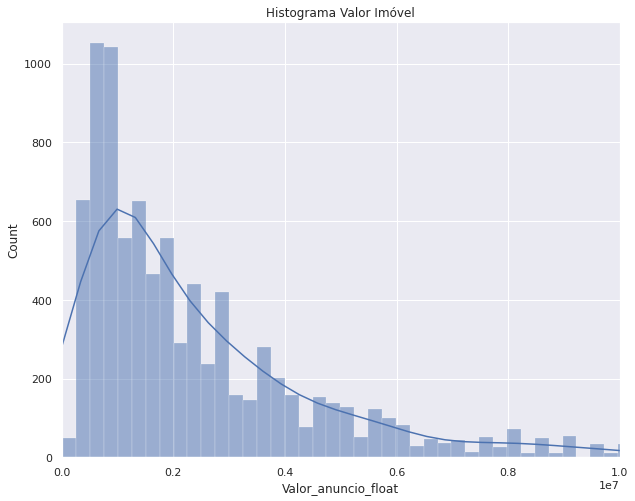

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
plt.figure(figsize=(10, 8))
ax = sns.histplot(data = dados_vendas, x = "Valor_anuncio_float", kde = True)
ax.set_title("Histograma Valor Imóvel")
plt.xlim((-50, 10000000))
plt.show()

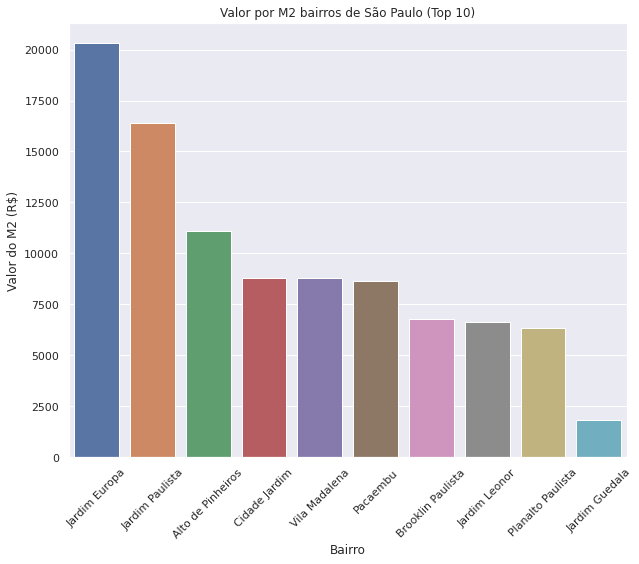

In [20]:
#Desafio 03 - Aula 2 (Gráfico ideal)
plt.figure(figsize=(10, 8))
ax = sns.barplot(x="Bairro", y="Valor_m2_bairro", data=dados_bairro.query("Bairro in @top_bairros").sort_values(by='Valor_m2_bairro', ascending=False))
ax.set_title('Valor por M2 bairros de São Paulo (Top 10)')
ax.set_xlabel('Bairro')
ax.set_ylabel('Valor do M2 (R$)')
ax.tick_params(axis='x', rotation=45)

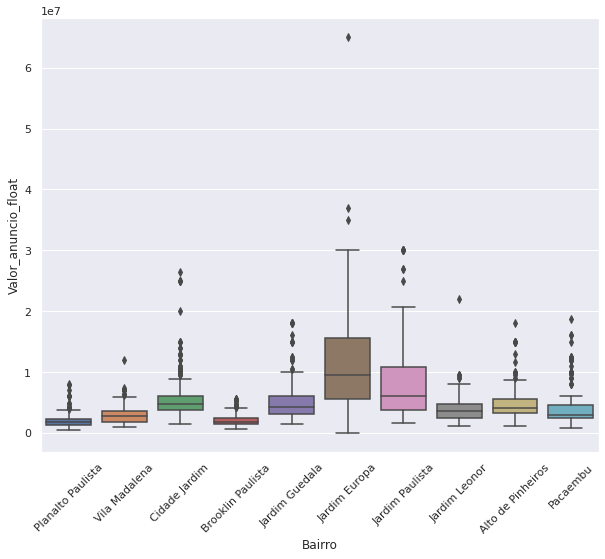

In [24]:
#Desafio 05 - Aula 2 (Análise de Quartis, outliers, etc...)
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data = dados_vendas.query("Bairro in @top_bairros"), x="Bairro", y="Valor_anuncio_float")
ax.tick_params(axis='x', rotation=45)
plt.show()

#Desafios

Desafio 01 - Tentar vincular dados do IBGE com os dados de imóveis.

In [125]:
#Reliazando um Left Join com os dados Bairro 
#a chave do nome do bairro já foi tratada na seção de tratamentos
#nota-se que não temos dados para alguns bairros
pd.merge(dados_bairro, dados_ibge, how='left', left_on='Bairro', right_on='Nome_do_distrito')

,Bairro,Metragem,Quartos,Banheiros,Vagas,Valor_anuncio_float,valor_milhoes,Valor_m2_bairro,Nome_do_municipio,Cod_distrito,...,V003,V004,V005,V006,V007,V008,V009,V010,V011,V012
0,Aclimação,19447,258,240,230,1.392928e+08,139.292801,7162.688384,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Alto da Boa Vista,3351,33,41,37,1.913000e+07,19.130000,5708.743659,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Alto da Lapa,23940,252,308,320,1.666535e+08,166.653500,6961.299081,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Alto da Mooca,5401,66,52,73,2.368340e+07,23.683400,4385.002777,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Alto de Pinheiros,158616,1453,1782,1827,1.764816e+09,1764.815915,11126.342330,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11611,Água Rasa,1117,16,12,22,4.297000e+06,4.297000,3846.911370,S�O PAULO,355030801.0,...,"2,55","1,44","2225,18","22464342,87","5025,58","36759423,46","1425,05","12571352,76","4220,97","25483670,53"
11612,Água Rasa,1117,16,12,22,4.297000e+06,4.297000,3846.911370,S�O PAULO,355030801.0,...,"3,18","2,52","2128,95","7805924,83","2685,02","8355829,9","1377,28","5388156,23","2245,16","6839880,08"
11613,Água Rasa,1117,16,12,22,4.297000e+06,4.297000,3846.911370,S�O PAULO,355030801.0,...,"3,14","1,29","8000,86","2248223528,14","11295,34","3144280336,75",4891,"842812804,98","7734,2","1312387298,67"
11614,Água Rasa,1117,16,12,22,4.297000e+06,4.297000,3846.911370,S�O PAULO,355030801.0,...,"2,72","1,45","4332,11","12091773,68","4377,72","12018656,74","2655,98","9296824,06","3419,02","9359216,76"


Desafio 02 - Tratar os outliers e comparar com os resultados.

Desafio 03 - Agrupar por mais de uma categoria e realizar as análises.

In [96]:
#Criando um DF específico para tratar os dados agrupados por bairro e quartos
dados_bairro_quartos = dados_vendas.groupby(['Bairro','Quartos'], ).sum()
dados_bairro_quartos.reset_index(inplace = True)

#calculando o valor médio do m2 do bairro
dados_bairro_quartos["Valor_m2_bairro"] = dados_bairro_quartos["Valor_anuncio_float"]/dados_bairro_quartos["Metragem"]

#esta coluna não faz sentido...
del dados_bairro_quartos["Valor_m2"]

,Bairro,Quartos,Metragem,Banheiros,Vagas,Valor_anuncio_float,valor_milhoes,Valor_m2_bairro
1178,Vila Mariana,1,500,5,5,3200000.0,3.200,6400.000000
1179,Vila Mariana,2,1130,18,10,7767000.0,7.767,6873.451327
1180,Vila Mariana,3,20940,299,290,164489000.0,164.489,7855.253104
1181,Vila Mariana,4,13053,185,138,97190000.0,97.190,7445.797901
1182,Vila Mariana,5,1686,18,31,15580000.0,15.580,9240.806643
1183,Vila Mariana,6,970,12,20,5100000.0,5.100,5257.731959
1184,Vila Mariana,7,400,5,2,3200000.0,3.200,8000.000000
1185,Vila Mariana,11,400,5,3,2800000.0,2.800,7000.000000


Text(0, 0.5, 'Valor do M2 (R$)')

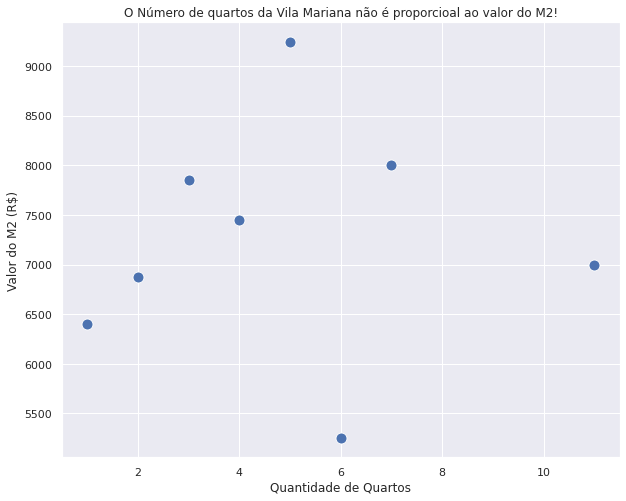

In [103]:
plt.figure(figsize=(10, 8))
ax = sns.scatterplot(x="Quartos", y="Valor_m2_bairro", data=dados_bairro_quartos.query("Bairro == 'Vila Mariana'"), s = 120)
ax.set_title('O valor do M2 na Vila Mariana não é proporcioal ao Número de quartos!')
ax.set_xlabel('Quantidade de Quartos')
ax.set_ylabel('Valor do M2 (R$)')

Desafio 04 - Organize o colab para deixar com cara de projeto.

- A primeira versão da organização é esta que está apresentada nos tópicos anteriores. Ao final, reunirei todas as aulas em um único notebook para ficar mais fácil consultas futuras